In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
import renders_py3 as rs
from IPython.display import display # Allows the use of display() for DataFrames
import matplotlib.pyplot as plt 
# Show matplotlib plots inline (nicely formatted in the notebook)
%matplotlib inline

# Load the wholesale customers dataset
try:
    data = pd.read_csv("customers.csv")
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print("Wholesale customers dataset has {} samples with {} features each.".format(*data.shape))
except:
    print("Dataset could not be loaded. Is the dataset missing?")

Wholesale customers dataset has 440 samples with 6 features each.


In [2]:
# Display a description of the dataset
display(data.describe())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [3]:
# TODO: Select three indices of your choice you wish to sample from the dataset
indices = [85, 181, 338]

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns = data.keys())

In [4]:
samples = samples.reset_index(drop=True)

In [5]:
samples

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,16117,46197,92780,1026,40827,2944
1,112151,29627,18148,16745,4948,8550
2,3,333,7021,15601,15,550


In [6]:
from sklearn.cross_validation import train_test_split
from sklearn.ensemble import RandomForestRegressor
features = data.columns
regressor = RandomForestRegressor(random_state=0,n_estimators=500)

for feature in features:
# TODO: Make a copy of the DataFrame, using the 'drop' function to drop the given feature
    new_data = data.drop(feature, axis=1)

    # TODO: Split the data into training and testing sets using the given feature as the target
    X_train, X_test, y_train, y_test = train_test_split(new_data, data[feature], test_size=0.25, random_state=0)

    # TODO: Create a decision tree regressor and fit it to the training set
    regressor = regressor.fit(X_train, y_train)
    print(regressor.feature_importances_)

    # TODO: Report the score of the prediction using the testing 
    ### this is using coffieicient of determination r2 scoring (best for regression)
    score = regressor.score(X_test, y_test)
    print("Score of prediction on test set for feature",feature,"is",score)

[ 0.17499093  0.12915513  0.30527016  0.15434769  0.23623609]
Score of prediction on test set for feature Fresh is 0.212906514712
[ 0.14232385  0.38695393  0.06088795  0.30464204  0.10519224]
Score of prediction on test set for feature Milk is 0.626132359395
[ 0.02538831  0.10403785  0.0189886   0.82887654  0.02270871]
Score of prediction on test set for feature Grocery is 0.814397017518
[ 0.23729139  0.11296706  0.10972714  0.19954493  0.34046948]
Score of prediction on test set for feature Frozen is 0.152595523811
[ 0.02676941  0.038473    0.88699104  0.01963459  0.02813195]
Score of prediction on test set for feature Detergents_Paper is 0.814209218595
[ 0.14406913  0.17581835  0.07934457  0.52510486  0.07566309]
Score of prediction on test set for feature Delicatessen is -3.98664107171


In [7]:
from sklearn.cross_validation import train_test_split
from sklearn.ensemble import RandomForestRegressor
features = data.columns
regressor = RandomForestRegressor(random_state=0,n_estimators=500)

# TODO: Make a copy of the DataFrame, using the 'drop' function to drop the given feature
new_data = data.drop(["Grocery","Milk"], axis=1)

# TODO: Split the data into training and testing sets using the given feature as the target
X_train, X_test, y_train, y_test = train_test_split(new_data, data["Grocery"], test_size=0.25, random_state=0)

# TODO: Create a decision tree regressor and fit it to the training set
regressor = regressor.fit(X_train, y_train)
print(regressor.feature_importances_)

# TODO: Report the score of the prediction using the testing 
### this is using coffieicient of determination r2 scoring (best for regression)
score = regressor.score(X_test, y_test)
print("Score of prediction on test set for feature","Grocery","is",score)

[ 0.03366397  0.03528591  0.88054159  0.05050853]
Score of prediction on test set for feature Grocery is 0.790932476324


In [8]:
#Data Preprocessing
#In this section, you will preprocess the data to create a better representation of customers by performing a scaling on the data and detecting (and optionally removing) outliers. Preprocessing data is often times a critical step in assuring that results you obtain from your analysis are significant and meaningful.

In [9]:
samples

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,16117,46197,92780,1026,40827,2944
1,112151,29627,18148,16745,4948,8550
2,3,333,7021,15601,15,550


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc2cedcca90>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fc2ce3b3278>]], dtype=object)

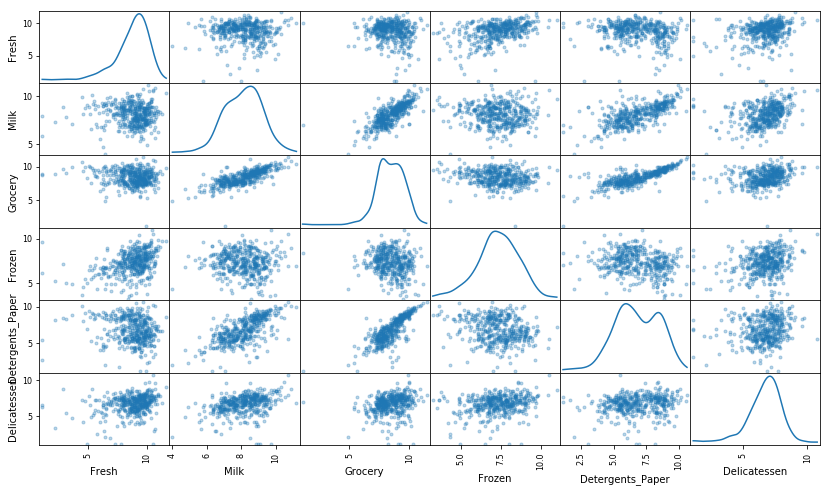

In [10]:
# TODO: Scale the data using the natural logarithm
log_data = np.log(data)

# TODO: Scale the sample data using the natural logarithm
log_samples = np.log(samples)

# Produce a scatter matrix for each pair of newly-transformed features
pd.scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde')

In [11]:
# Display the log-transformed sample data
display(log_samples)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,9.687630,10.740670,11.437986,6.933423,10.617099,7.987524
1,11.627601,10.296441,9.806316,9.725855,8.506739,9.053687
2,1.098612,5.808142,8.856661,9.655090,2.708050,6.309918


In [12]:
### using tukey's method of IQR*1.5 (CAN BE changed depending on need)
potential_outliers = []

# For each feature find the data points with extreme high or low values
for feature in log_data.keys():
    
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data[feature],25)
    
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data[feature],75)
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = 1.5 * (Q3-Q1)
    
    # Display the outliers
    print("Data points considered outliers for the feature",feature)
    #display(log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))])
    list = log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))].index.tolist()
    potential_outliers.extend(list)

print(potential_outliers)
print(len(log_data.index))
print(len(potential_outliers))


Data points considered outliers for the feature Fresh
Data points considered outliers for the feature Milk
Data points considered outliers for the feature Grocery
Data points considered outliers for the feature Frozen
Data points considered outliers for the feature Detergents_Paper
Data points considered outliers for the feature Delicatessen
[65, 66, 81, 95, 96, 128, 171, 193, 218, 304, 305, 338, 353, 355, 357, 412, 86, 98, 154, 356, 75, 154, 38, 57, 65, 145, 175, 264, 325, 420, 429, 439, 75, 161, 66, 109, 128, 137, 142, 154, 183, 184, 187, 203, 233, 285, 289, 343]
440
48


In [13]:
good_data = log_data.drop(log_data.index[potential_outliers]).reset_index(drop = True)

In [14]:
good_data.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,9.446913,9.175335,8.930759,5.365976,7.891331,7.198931
1,8.861775,9.191158,9.166179,7.474205,8.099554,7.482119
2,8.756682,9.083416,8.946896,7.785305,8.165079,8.967504
3,9.492884,7.086738,8.347827,8.764678,6.228511,7.488853
4,10.026369,8.596004,8.881558,8.272571,7.482682,8.553525


In [15]:
good_data.describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,8.933438,8.121251,8.418637,7.429215,6.787511,6.801190
std,1.116110,1.007751,1.011809,1.129943,1.610957,1.029976
min,5.541264,5.303305,5.407172,4.510860,1.609438,3.828641
25%,8.304866,7.376038,7.661527,6.721426,5.573103,6.105339
50%,9.116895,8.191878,8.427922,7.455588,6.669498,6.905249
75%,9.739143,8.825039,9.186270,8.228172,8.205335,7.512071
max,11.627601,10.901524,11.437986,10.463360,10.617099,9.712509


In [16]:
potential_outliers

[65,
 66,
 81,
 95,
 96,
 128,
 171,
 193,
 218,
 304,
 305,
 338,
 353,
 355,
 357,
 412,
 86,
 98,
 154,
 356,
 75,
 154,
 38,
 57,
 65,
 145,
 175,
 264,
 325,
 420,
 429,
 439,
 75,
 161,
 66,
 109,
 128,
 137,
 142,
 154,
 183,
 184,
 187,
 203,
 233,
 285,
 289,
 343]

In [17]:
x = set([i for i in potential_outliers if potential_outliers.count(i)>1])

In [18]:
x

{65, 66, 75, 128, 154}

In [19]:
log_data.loc[x]

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442


In [20]:
data.loc[x]

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
128,140,8847,3823,142,1062,3
65,85,20959,45828,36,24231,1423
66,9,1534,7417,175,3468,27
75,20398,1137,3,4407,3,975
154,622,55,137,75,7,8


In [21]:
##### data ==> original data
##### good_data ==> log_data with removed outliers
#### log_data => transformed data

In [33]:
# TODO: Apply PCA by fitting the good data with the same number of dimensions as features
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(good_data)

# Generate PCA results plot
new_pca_data = pca.transform(good_data)
pca_samples = pca.transform(log_samples)

In [34]:
new_pca_data.shape

(398, 2)

In [35]:
pca.explained_variance_ratio_

array([ 0.49930484,  0.22594807])

In [39]:
pca_data = pd.DataFrame(new_pca_data, columns = ['Dimension 1', 'Dimension 2'])

In [40]:
pca_samples = pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2'])

In [28]:
#### clustering to identify hidden patterns in the data

In [41]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [42]:
# Loop through different cluster numbers to see which 
# gives th ehighest silhouette score.
for i in range(2,20):
    print("Number of components: ", i)
    clusterer = KMeans(n_clusters=i, random_state=0)
    clusterer.fit(pca_data)

    # TODO: Predict the cluster for each data point
    preds = clusterer.predict(pca_data)
    # TODO: Find the cluster centers
    #print(preds)
    centers = clusterer.cluster_centers_
    #print("Cluster centres: ",centers)
    
    print("cluster distance", clusterer.inertia_)
    # TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
    score = silhouette_score(pca_data, preds)
    print("Silhouette score: ", score, "\n")


Number of components:  2
cluster distance 1186.02229992
Silhouette score:  0.447157742293 

Number of components:  3
cluster distance 879.027286177
Silhouette score:  0.36398647984 

Number of components:  4
cluster distance 692.924188446
Silhouette score:  0.331150954285 

Number of components:  5
cluster distance 556.663619657
Silhouette score:  0.352412352774 

Number of components:  6
cluster distance 461.162665635
Silhouette score:  0.362761015127 

Number of components:  7
cluster distance 400.058738412
Silhouette score:  0.354716184747 

Number of components:  8
cluster distance 350.409917301
Silhouette score:  0.367260764215 

Number of components:  9
cluster distance 311.301990756
Silhouette score:  0.367312031027 

Number of components:  10
cluster distance 279.045603235
Silhouette score:  0.351812185856 

Number of components:  11
cluster distance 254.884963099
Silhouette score:  0.358248222952 

Number of components:  12
cluster distance 233.745608282
Silhouette score:  0.3

In [45]:
clusterer = KMeans(n_clusters=3, random_state=0)
clusterer.fit(pca_data)

# TODO: Predict the cluster for each data point
preds = clusterer.predict(pca_data)
# TODO: Find the cluster centers
#print(preds)
centers = clusterer.cluster_centers_
print("Cluster centres: ",centers)

print("cluster distance", clusterer.inertia_)
# TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
score = silhouette_score(pca_data, preds)
print("Silhouette score: ", score, "\n")


Cluster centres:  [[-1.7771009  -0.59796717]
 [ 2.17038578 -0.37700312]
 [-0.54651961  1.45491537]]
cluster distance 879.027286177
Silhouette score:  0.36398647984 



In [57]:
#### data recovery

# TODO: Inverse transform the centers
log_centers = pca.inverse_transform(centers)

# TODO: Exponentiate the centers
true_centers = np.exp(log_centers)

# Display the true centers
print(true_centers)
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments
display(true_centers)

[[  6295.64799031   1494.00164645   1931.45760048   1451.08006937
     235.16124878    514.67948934]
 [  4890.94782027   7795.54997362  11679.95782427   1006.0787711
    4675.66116234   1063.23646297]
 [ 19165.22375289   3281.38484145   4007.79384299   4517.5851699
     554.29684631   1618.3995935 ]]


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,6296,1494,1931,1451,235,515
Segment 1,4891,7796,11680,1006,4676,1063
Segment 2,19165,3281,4008,4518,554,1618
